### Machine Failure Dataset

In [549]:
from warnings import filterwarnings
filterwarnings('ignore')

### Read the train Dataset

In [550]:
import pandas as pd
df = pd.read_csv("train.csv")
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [551]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

### Check missing values

In [552]:
m = df.isna().sum()
m[m>0]

Series([], dtype: int64)

### Seperate X and Y

In [553]:
X = df.drop(columns=['Product ID', 'Type', 'HDF', 'OSF', 'Machine failure'])
Y = df[['Machine failure']]

In [554]:
X.head()

,id,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,PWF,RNF
0,0,300.6,309.6,1596,36.1,140,0,0,0
1,1,302.6,312.1,1759,29.1,200,0,0,0
2,2,299.3,308.5,1805,26.5,25,0,0,0
3,3,301.0,310.9,1524,44.3,197,0,0,0
4,4,298.0,309.0,1641,35.4,34,0,0,0


In [555]:
Y.head()

,Machine failure
0,0
1,0
2,0
3,0
4,0


### Cat Con Seperation for X

In [556]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [557]:
cat

[]

### Create Sklearn pipeline for feature selection

In [558]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [559]:
num_pipe1 = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                            ('scaler', StandardScaler())])

In [560]:
cat_pipe1 = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                            ('ordinal', OrdinalEncoder())])

In [561]:
pre1 = ColumnTransformer([('num', num_pipe1, con),
                          ('cat', cat_pipe1, cat)]).set_output(transform='pandas')

In [562]:
pre1

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['id', 'Air temperature [K]',
                                  'Process temperature [K]',
                                  'Rotational speed [rpm]', 'Torque [Nm]',
                                  'Tool wear [min]', 'TWF', 'PWF', 'RNF']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinal',
                                                  OrdinalEncoder())]),
                                 [])])

In [563]:
X_pre = pre1.fit_transform(X)
X_pre.head()

,num__id,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__PWF,num__RNF
0,-1.732038,0.395880,-0.246230,0.545416,-0.499711,0.556417,-0.03945,-0.049016,-0.047568
1,-1.732013,1.469856,1.558605,1.720308,-1.323028,1.494433,-0.03945,-0.049016,-0.047568
2,-1.731987,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,-0.03945,-0.049016,-0.047568
3,-1.731962,0.610675,0.692284,0.026445,0.464745,1.447532,-0.03945,-0.049016,-0.047568
4,-1.731937,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,-0.03945,-0.049016,-0.047568


### Mutual Info Scores and plot

In [564]:
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(X_pre, Y)
mi

array([3.78506040e-05, 5.22337039e-03, 2.21471395e-03, 1.90627875e-02,
       1.99429268e-02, 6.75955811e-03, 7.74590174e-03, 1.17643438e-02,
       1.66610253e-03])

In [565]:
mi = pd.Series(mi)
mi.index = X_pre.columns
mi = mi.sort_values(ascending=False)
mi

num__Torque [Nm]                0.019943
num__Rotational speed [rpm]     0.019063
num__PWF                        0.011764
num__TWF                        0.007746
num__Tool wear [min]            0.006760
num__Air temperature [K]        0.005223
num__Process temperature [K]    0.002215
num__RNF                        0.001666
num__id                         0.000038
dtype: float64

<Axes: title={'center': 'Mutual Information Scores'}>

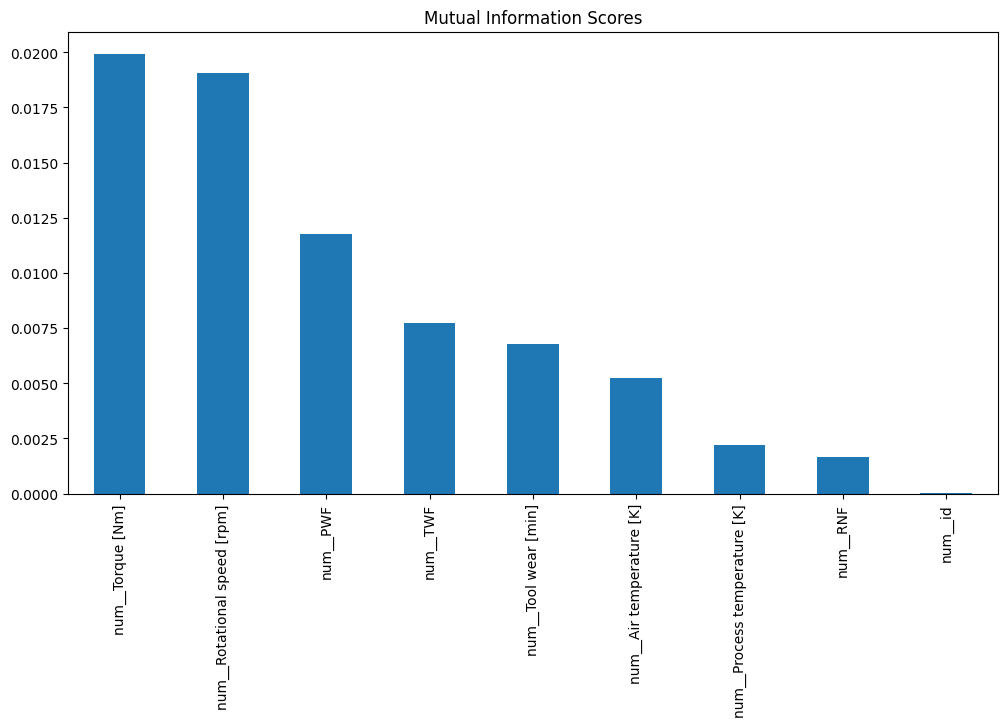

In [566]:
mi.plot(kind='bar', title='Mutual Information Scores', figsize=(12, 6))

### Select 4 top Feature

In [567]:
from sklearn.feature_selection import SelectKBest
sel = SelectKBest(mutual_info_classif, k=4)
sel.fit(X_pre, Y)
sel_cols = sel.get_feature_names_out()
sel_cols

array(['num__Rotational speed [rpm]', 'num__Torque [Nm]', 'num__TWF',
       'num__PWF'], dtype=object)

In [568]:
sel_cols[0].split('__')

['num', 'Rotational speed [rpm]']

In [569]:
sel_cols[0].split('__')[1]

'Rotational speed [rpm]'

In [570]:
imp_cols = []
for i in sel_cols:
    s = i.split('__')[1]
    imp_cols.append(s)

In [571]:
imp_cols

['Rotational speed [rpm]', 'Torque [Nm]', 'TWF', 'PWF']

In [572]:
X_imp = X[imp_cols]
X_imp

,Rotational speed [rpm],Torque [Nm],TWF,PWF
0,1596,36.1,0,0
1,1759,29.1,0,0
2,1805,26.5,0,0
3,1524,44.3,0,0
4,1641,35.4,0,0
...,...,...,...,...
136424,1530,37.5,0,0
136425,1447,49.1,0,0
136426,1524,38.5,0,0
136427,1447,46.3,0,0


### Seperation cat and con 

In [573]:
cat_sel = list(X_imp.columns[X_imp.dtypes=='object'])
con_sel = list(X_imp.columns[X_imp.dtypes!='object'])

In [574]:
cat_sel

[]

In [575]:
con_sel

['Rotational speed [rpm]', 'Torque [Nm]', 'TWF', 'PWF']

### Create final sklearn pipeline

Cat-Onehotencoder

In [576]:
from sklearn.preprocessing import OneHotEncoder

In [577]:
num_pipe2 = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                            ('scaler', StandardScaler())])

In [578]:
cat_pipe2 = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                            ('OHE', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [579]:
pre2 = ColumnTransformer([('num', num_pipe2, con_sel),
                          ('cat', cat_pipe2, cat_sel)]).set_output(transform='pandas')

In [580]:
X_sel_pre = pre2.fit_transform(X_imp)
X_sel_pre.head()

,num__Rotational speed [rpm],num__Torque [Nm],num__TWF,num__PWF
0,0.545416,-0.499711,-0.03945,-0.049016
1,1.720308,-1.323028,-0.03945,-0.049016
2,2.051873,-1.628831,-0.03945,-0.049016
3,0.026445,0.464745,-0.03945,-0.049016
4,0.869773,-0.582043,-0.03945,-0.049016
